# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** TOK SE KA
- **Email:** mc185d5y2370@student.devacademy.id
- **ID Dicoding:** MC185D5Y2370

## Menentukan Pertanyaan Bisnis

- Selama periode 2011–2012, bagaimana tren jumlah total penyewaan sepeda (cnt) dan seberapa besar perbedaannya di antara masing-masing musim (season)?
- Seberapa kuat keterkaitan (korelasi) antara hari liburan (holiday) terhadap jumlah penyewaan sepeda (cnt) per jam dalam kurun waktu 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

memakai google drive untuk menyimpan data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Membuka dataset dari google drive atau github (agar lebih mudah karena sudah masuk repo public)

In [ ]:
# day_df = pd.read_csv("/content/drive/MyDrive/DATASET/day.csv")
day_df = pd.read_csv("https://raw.githubusercontent.com/TokSeKa-uajy/datasetPython/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# hour_df = pd.read_csv("/content/drive/MyDrive/DATASET/hour.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/TokSeKa-uajy/datasetPython/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

**Insight:**
- Terdapat 18 Kolom / Column
- Bisa memakai dteday sebagai variabel waktu
- Cuaca bisa jadi faktor yang bagus untuk menjadi indikator
- Liburan bisa jadi berpengaruh terhadap jumlah pesepeda, kenapa tidak working day? karena Saya merasa liburan lebih spesial dan bisa dipakai untuk dataset. plus, mungkin bisa diberi diskon khusus liburan.
- cnt adalah total pesepeda, akan dipakai untuk menentukan pesepeda

### Assessing Data

Melihat informasi kedua dataset

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


kolom dteday harusnya datetime bukan object

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak ada data kosong

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada duplikasi data

**Insight:**
- terdapat kesalahan tipe data untuk kolom dteday
- Datanya tidak ada keanehan yang berhubungan dengan input data (null, duplicated, atau innacurate value)
- Tidak ada kejanggalan signifikan, jika cek std untuk casual, registeredm atau cnt mungkin terlihat besar, tapi melihat min max dari data tersebut, maka semua tampak normal.
- Data seperti temp, atemp ataupun hum telah dinormalisasi.

### Cleaning Data

Mengubah string menjadi date

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berhasil membersihkan data berupa string menuju datetime
- Tidak ada pembersihan lainnya

## Exploratory Data Analysis (EDA)

### Eksplorasi data day dan hour


  Mengecek deskripsi atau informasi secara keseluruhan

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dari analisis data keseluruhan tampak normal.

Notes dari Kaggle : season (1:springer, 2:summer, 3:fall, 4:winter)

### Untuk pertanyaan pertama

Data yang didapatkan dari observasi :
- Berdasarkan data harian dan per jam, jumlah rata-rata serta total peminjaman sepeda meningkat pada musim gugur (Season 3: Fall).
- Musim semi (Season 1: Spring) memiliki jumlah peminjaman rata-rata paling sedikit dibandingkan musim lainnya.
- Musim panas (Season 2: Summer) memiliki jumlah peminjaman harian minimum yang lebih rendah dibandingkan musim lain, meskipun secara rata-rata lebih tinggi daripada musim semi.
- Musim gugur (Season 3) memiliki jumlah peminjaman harian minimum tertinggi dibandingkan musim lain. Hal ini dapat mengindikasikan bahwa musim gugur lebih nyaman untuk bersepeda dibandingkan musim lainnya.

Kesimpulan :
- Jika ditinjau dari awal tahun (dimulai dari Season 1: Spring), tren peminjaman sepeda menunjukkan pola naik dan turun yang konsisten.
- Tren peminjaman dimulai dari level terendah di musim semi (Season 1), meningkat di musim panas (Season 2), mencapai puncaknya di musim gugur (Season 3), lalu kembali menurun di musim dingin (Season 4).
- Hal ini menunjukkan bahwa musim memiliki pengaruh signifikan terhadap kebiasaan masyarakat dalam menggunakan sepeda, di mana musim yang lebih nyaman untuk aktivitas luar ruangan (seperti musim gugur) cenderung meningkatkan jumlah penyewaan.




Proses yang dilakukan
- Mengelompokkan data berdasarkan musim (season).
- Menghitung statistik utama (nilai maksimum, minimum, rata-rata, standar deviasi, dan total peminjaman) dari jumlah penyewaan sepeda (cnt) untuk setiap musim.

In [ ]:
print("Harian")
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

Harian


cnt                                         
         max   min         mean          std      sum
season                                               
1       7836   431  2604.132597  1399.942119   471348
2       8362   795  4992.331522  1695.977235   918589
3       8714  1115  5644.303191  1459.800381  1061129
4       8555    22  4728.162921  1699.615261   841613

In [ ]:
print("perjam")
hour_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

perjam


cnt                                     
        max min        mean         std      sum
season                                          
1       801   1  111.114569  119.224010   471348
2       957   1  208.344069  188.362473   918589
3       977   1  236.016237  197.711630  1061129
4       967   1  198.868856  182.967972   841613

Jika datanya dipecah menjadi tahunan, maka jumlah sepeda per seasonnya tetap konsisten dengan hasil sebelumnya. Menunjukkan bahwa ini konsisten terjadi per season


In [ ]:
print("Harian")
day_df.groupby(["yr", "season"]).agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

Harian


cnt                                        
            max   min         mean          std     sum
yr season                                              
0  1       3239   431  1666.666667   614.012663  150000
   2       5805   795  3775.173913  1138.901028  347316
   3       6043  1115  4464.361702   798.348077  419650
   4       5511   627  3664.460674   983.006128  326137
1  1       7836   441  3531.296703  1341.203270  321348
   2       8362  1027  6209.489130  1221.345569  571273
   3       8714  4073  6824.244681   912.756191  641479
   4       8555    22  5791.865169  1598.520901  515476

### Untuk soal kedua
Perbedaan Tren Antara Hari Kerja dan Hari Libur

Hari Kerja (holiday = 0)
- Pola penyewaan di hari kerja terdapat 2 waktu lonjakan.
- Lonjakan pertama pada sekitar jam 8 pagi (hr = 8) dengan Mean : 364.6 dan Sum: 257420
- Lonjakan kedua pada sekitar 17-18 sore (hr = 17 & 18) dengan Mean : 466.4 & 430.2 dan Sum: 330704 & 304128

Hari Libur (holiday = 1)
- Puncak utama terjadi antara pukul 12-16 (siang hingga sore), dengan rata-rata penyewaan tertinggi pada jam 13 dengan Mean: 298.5 dan Sum: 6.269.
- Tidak ada lonjakan signifikan di pagi hari, menunjukkan kurangnya pengguna yang berangkat kerja atau sekolah di hari libur.

Kesimpulan:
- Pengguna cenderung menyewa sepeda untuk rekreasi atau aktivitas santai di siang hingga sore hari pada hari libur.
- Tidak ada lonjakan di pagi dan sore hari seperti pada hari kerja, karena tidak ada keharusan untuk berangkat kerja atau pulang kerja.

Proses yang dilakukan
- Menganalisis pola peminjaman sepeda berdasarkan hari libur & hari kerja
- Mengvisualisasikan data per jam
- Mengidentifikasi jam sibuk dan jam sepi

In [ ]:
print("Jam")
hour_df.groupby(["holiday", "hr"]).agg({
    "cnt": ["max", "min", "mean", "sum"]
})

Jam


cnt                        
            max min        mean     sum
holiday hr                             
0       0   283   2   53.791489   37923
        1   168   1   33.210526   23347
        2   132   1   22.791066   15817
        3    79   1   11.730486    7965
        4    28   1    6.367799    4311
        5    66   1   20.169540   14038
        6   213   1   77.468750   54538
        7   596   1  215.929178  152446
        8   839   5  364.617564  257420
        9   426  14  220.740793  155843
        10  539   8  172.781870  121984
        11  663  10  206.941926  146101
        12  776   3  252.311174  178384
        13  760  11  252.330508  178650
        14  750  12  239.604520  169640
        15  750   7  250.820621  177581
        16  783  11  313.159379  222030
        17  976  15  466.437236  330704
        18  977  23  430.166902  304128
        19  743  11  314.189533  222132
        20  567  11  227.458274  160813
        21  398   6  173.123055  122398
        22  338   9  132.002829   93326
        23  256   6   88.719943   62725
1       0   159  11   57.476190    1207
        1   123  10   38.904762     817
        2    93   4   25.476190     535
        3    32   2   11.611111     209
        4    16   1    5.850000     117
        5    38   1   10.619048     223
        6   133   4   28.285714     594
        7   387   6   82.142857    1725
        8   597  11  170.523810    3581
        9   397  28  171.190476    3595
        10  447  32  203.476190    4273
        11  485  64  248.523810    5219
        12  543  80  287.142857    6030
        13  566  93  298.523810    6269
        14  547  86  286.285714    6012
        15  460  87  265.142857    5568
        16  501  56  272.285714    5718
        17  712  50  293.142857    6156
        18  676  37  268.761905    5644
        19  522  28  221.761905    4657
        20  551  29  177.952381    3737
        21  584  26  145.095238    3047
        22  502  11  108.857143    2286
        23  183   2   57.904762    1216

**Insight:**

Untuk soal pertama:

- Jika ditinjau dari awal tahun (dimulai dari Season 1: Spring), tren peminjaman sepeda menunjukkan pola naik dan turun yang konsisten.
- Tren peminjaman dimulai dari level terendah di musim semi (Season 1), meningkat di musim panas (Season 2), mencapai puncaknya di musim gugur (Season 3), lalu kembali menurun di musim dingin (Season 4).
- Hal ini menunjukkan bahwa musim memiliki pengaruh signifikan terhadap kebiasaan masyarakat dalam menggunakan sepeda, di mana musim yang lebih nyaman untuk aktivitas luar ruangan (seperti musim gugur) cenderung meningkatkan jumlah penyewaan.


Untuk soal kedua:
- Pengguna cenderung menyewa sepeda untuk rekreasi atau aktivitas santai di siang hingga sore hari pada hari libur.
- Tidak ada lonjakan di pagi dan sore hari seperti pada hari kerja, karena tidak ada keharusan untuk berangkat kerja atau pulang kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Membuat barchart berdasarkan season

<ipython-input-44-30cad7df25ef>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


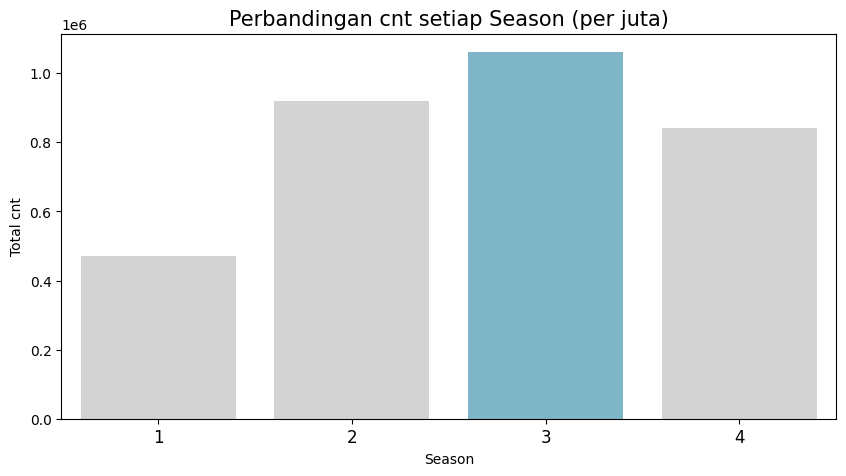

In [ ]:
byseason_df = day_df.groupby(by="season").agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 5))
colors = ["#D3D3D3","#D3D3D3", "#72BCD4", "#D3D3D3"]

sns.barplot(
    y="cnt",
    x="season",
    data=byseason_df,
    palette=colors
)

plt.title("Perbandingan cnt setiap Season (per juta)", loc="center", fontsize=15)
plt.ylabel("Total cnt")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

Membuat line chart berdasarkan liburan

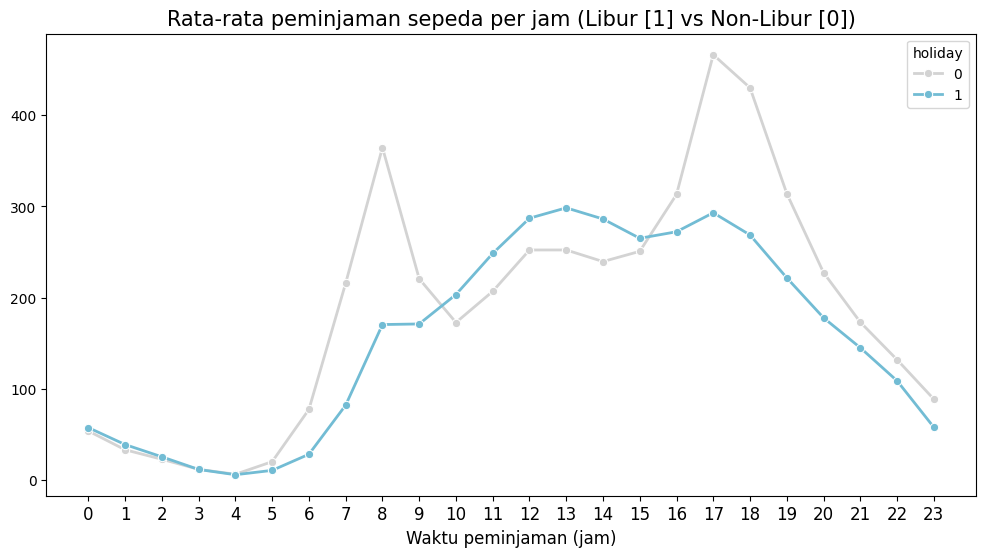

In [ ]:
holiday_orders_df = hour_df.groupby(["holiday", "hr"]).agg({
    "cnt": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(
    y="cnt",
    x="hr",
    data=holiday_orders_df,
    palette=["#D3D3D3", "#72BCD4"],
    hue="holiday",
    marker="o",
    linewidth=2,
)

plt.title("Rata-rata peminjaman sepeda per jam (Libur [1] vs Non-Libur [0])", fontsize=15)
plt.xlabel("Waktu peminjaman (jam)", fontsize=12)
plt.ylabel(None)
plt.xticks(range(0, 24))
plt.tick_params(axis='x', labelsize=12)
plt.show()


**Insight:**

Pada visualisasi soal pertama :
- Tren menunjukkan pola naik-turun yang konsisten, di mana jumlah peminjaman rendah di awal tahun (musim semi), naik di musim panas dan puncaknya di musim gugur, lalu turun kembali di musim dingin.
- Musim berpengaruh besar terhadap kebiasaan masyarakat dalam menggunakan sepeda.

Pada visualisasi soal kedua :
- Hari kerja (holiday = 0) / garis abu abu : terdapat dua lonjakan utama dalam sehari, menunjukkan pola penggunaan yang terkait dengan aktivitas kerja/sekolah, yaitu Pagi sekitar jam 8 dan Sore sekitar jam 17-18.
- Hari Libur (holiday = 1) / garis biru : Tidak ada lonjakan besar di pagi hari, berbeda dengan hari kerja. Ini menunjukkan tidak adanya aktivitas berangkat kerja/sekolah di hari libur. Selanjutnya, puncak peminjaman terjadi lebih merata antara jam 12-16 (siang - sore).


## Analisis Lanjutan (Clustering)
### Mengelompokkan customer berdasarkan keadaan cuaca saat transaksi
- visualisasi dalam bentuk pie chart

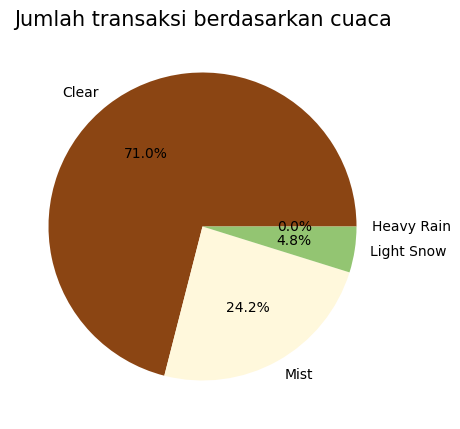

In [ ]:
byweather_df = hour_df.groupby(by="weathersit").agg({"cnt":"sum"}).squeeze()
plt.figure(figsize=(10, 5))
nameLabels=("Clear", "Mist", "Light Snow", "Heavy Rain")
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
plt.pie(
    x=byweather_df,
    labels=nameLabels,
    autopct='%1.1f%%',
    colors=colors,
)
plt.title("Jumlah transaksi berdasarkan cuaca", loc="center", fontsize=15)
plt.show()

Berdasarkan gambar di atas, diketahui bahwa kebanyakan pelanggan merental sepeda di cuaca yang aman (clear). Semakin buruk cuacanya, maka jumlah rental sepeda yang di rental akan ikut semakin sedikit. Untuk bagian heavy rain (hujan badai) hanya ada 4 transaksi yang terjadi sepanjang 2 tahun.

## Conclusion

- Hasil observasi menunjukkan bahwa musim memiliki pengaruh signifikan terhadap pola peminjaman sepeda. Musim gugur (Season 3) menjadi puncak tertinggi dalam peminjaman, kemungkinan karena cuaca yang lebih nyaman. Musim semi (Season 1) memiliki peminjaman terendah, sementara musim panas (Season 2) mengalami peningkatan, meskipun jumlah minimumnya lebih rendah dibandingkan musim lain. Musim dingin (Season 4) kembali menunjukkan penurunan, kemungkinan akibat kondisi cuaca yang kurang mendukung. Tren peminjaman mengikuti pola naik-turun yang konsisten, dengan peningkatan dari musim semi hingga puncaknya di musim gugur, lalu menurun kembali di musim dingin. Kesimpulannya, musim yang lebih nyaman untuk aktivitas luar ruangan cenderung meningkatkan jumlah penyewaan sepeda.
- Pola peminjaman sepeda berbeda antara hari kerja dan hari libur. Pada hari kerja, terdapat dua lonjakan utama, yaitu pagi hari sekitar pukul 08:00 saat orang berangkat kerja dan sore hari sekitar pukul 17:00-18:00 saat mereka pulang. Sebaliknya, pada hari libur, peminjaman lebih merata dengan puncak tertinggi terjadi antara siang hingga sore (12:00-16:00), tanpa lonjakan signifikan di pagi atau sore hari. Hal ini menunjukkan bahwa pada hari kerja, sepeda lebih sering digunakan sebagai moda transportasi, sementara pada hari libur lebih banyak digunakan untuk rekreasi dan aktivitas santai.
- Berdasarkan data, sebagian besar pelanggan menyewa sepeda dalam kondisi cuaca cerah (Clear - 71.0%), diikuti oleh Mist (24.2%). Ketika cuaca memburuk, jumlah perentalan sepeda juga menurun drastis. Light Snow hanya menyumbang 4.8% dari total transaksi, sementara Heavy Rain hampir tidak memiliki transaksi sama sekali (hanya 4 transaksi dalam 2 tahun, sehingga ditampilkan sebagai 0.0%).
Hal ini menunjukkan bahwa cuaca berperan besar dalam keputusan pelanggan untuk merental sepeda. Saat kondisi cuaca semakin ekstrem (hujan badai atau salju), penggunaan sepeda menjadi sangat terbatas, kemungkinan karena faktor keamanan dan kenyamanan.